In [3]:
from moviepy.editor import VideoClip, TextClip, CompositeVideoClip, clips_array, ImageSequenceClip
from PIL import Image, ImageDraw, ImageFont
import IPython.display as display
import os

# Redimensionar imagem

In [4]:
def redimensionar_imagem_para_tiktok(imagem_path, largura_tiktok=1080, altura_tiktok=1920):
    imagem_original = Image.open(imagem_path)
    imagem_redimensionada = imagem_original.resize((largura_tiktok, altura_tiktok))
    return imagem_redimensionada

## Primeira imagem e teste da função

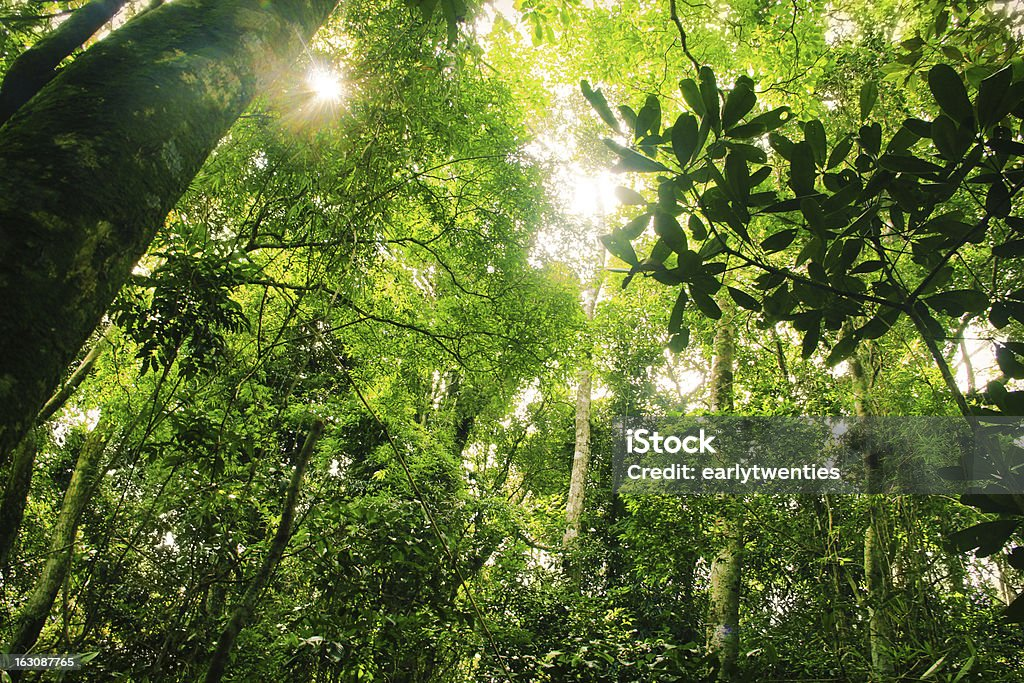

Dimensões da imagem: Largura = 1024, Altura = 683


In [5]:
# Carregar a imagem
imagem_path = "C:/Users/Thiago/Documents/Projetos/DarkTok/v0/Imagens/Floresta.jpg"  # Substitua pelo caminho real da sua imagem
imagem = Image.open(imagem_path)

# Mostrar a imagem
display.display(imagem)

# Obter as dimensões da imagem
largura, altura = imagem.size
print(f"Dimensões da imagem: Largura = {largura}, Altura = {altura}")

In [6]:
img_reshape = redimensionar_imagem_para_tiktok(imagem_path = imagem_path, largura_tiktok=1080, altura_tiktok=1920)

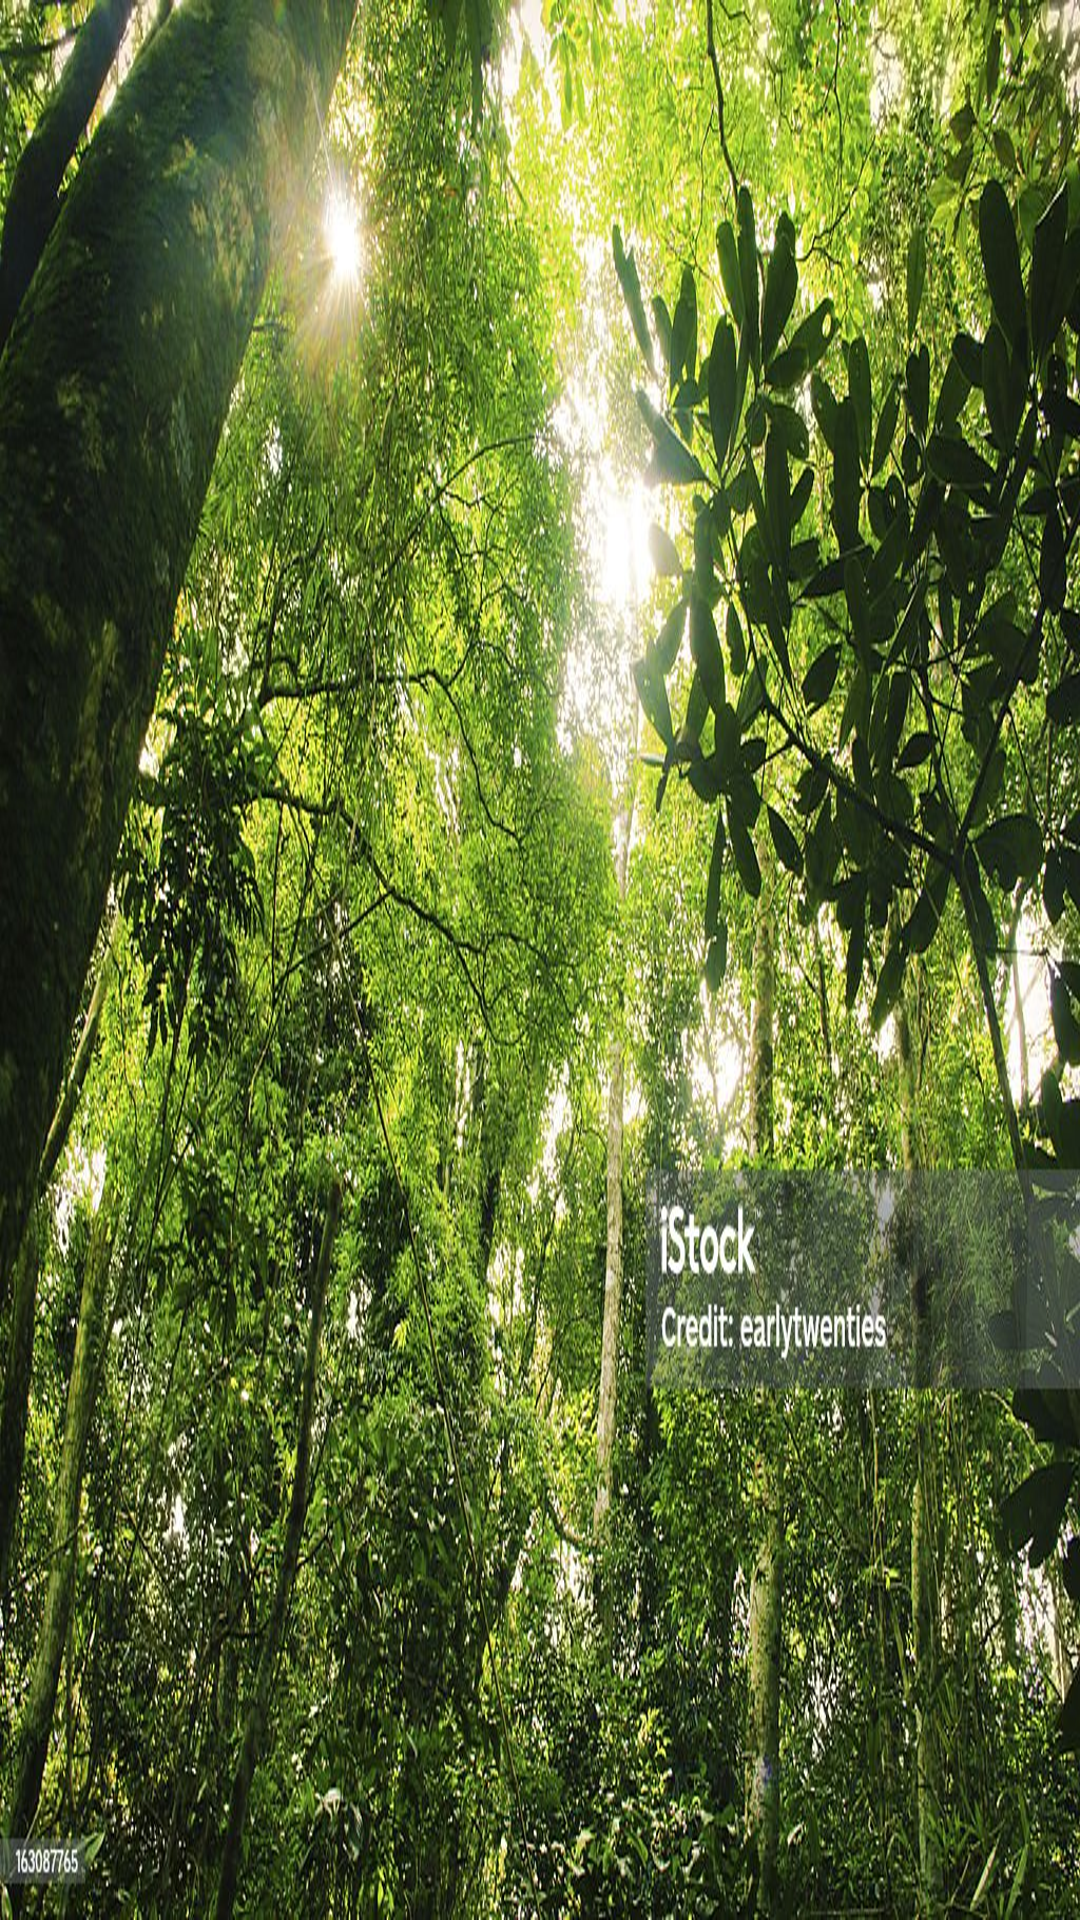

Dimensões da imagem: Largura = 1080, Altura = 1920


In [7]:
display.display(img_reshape)

# Obter as dimensões da imagem
largura, altura = img_reshape.size
print(f"Dimensões da imagem: Largura = {largura}, Altura = {altura}")

Bem, essa parte podemos ver que funciona. Agora vamos tentar colocar em vídeo.

# Escrevendo na Imagem

In [8]:
import cv2
import numpy as np
import textwrap
import os

def criar_imagem_com_texto(texto, img, pasta, nome_arquivo):


    print(texto)
    img = np.array(img)
    # Definir tamanho da caixa de texto (80% da altura e largura)
    largura_caixa = int(img.shape[1] * 0.8)
    altura_caixa = int(img.shape[0] * 0.8)

    # Criar uma imagem preta como fundo
    nova_img = np.zeros_like(img)

    # Copiar a imagem original para a nova imagem
    nova_img[:img.shape[0], :img.shape[1], :] = img

    # Quebrar o texto em linhas para caber na caixa de texto
    linhas = textwrap.wrap(texto, width=20,replace_whitespace=True)  # Ajuste o valor de width conforme necessário

    # Escolher a fonte e tamanho
    fonte = cv2.FONT_HERSHEY_SIMPLEX
    tamanho_fonte = 3
    espessura = 4

    # Calcular a altura total do texto justificado
    altura_total_texto = sum(cv2.getTextSize(linha, fonte, tamanho_fonte, espessura)[0][1] for linha in linhas)

    # Calcular a posição de início para centralizar o texto na caixa
    y_pos = int((altura_caixa - altura_total_texto) / 2)

    # Desenhar texto justificado
    for linha in linhas:
        (largura_texto, altura_texto), baseline = cv2.getTextSize(linha, fonte, tamanho_fonte, espessura)
        x_pos = int((largura_caixa - largura_texto) / 2)
        cv2.putText(nova_img, linha, (100 + x_pos, y_pos), fonte, tamanho_fonte, (0, 255, 255), espessura, cv2.LINE_AA)
        y_pos += altura_texto + baseline  # Ajustar posição Y para a próxima linha

    # Salvar a nova imagem na pasta com o nome indicado
    caminho_salvar = os.path.join(pasta, nome_arquivo)
    cv2.imwrite(caminho_salvar, nova_img)

In [9]:

#Escolhe a imagem
imagem_path = "C:/Users/Thiago/Documents/Projetos/DarkTok/v0/Imagens/Floresta.jpg"

# Faz o reshape da imagem
img_reshape = redimensionar_imagem_para_tiktok(imagem_path = imagem_path, largura_tiktok=1080, altura_tiktok=1920)


# Lista com os textos (Será subtituído por função que pega do json sozinho)
textos = ["In the beginning God created the heavens and the earth.", 
          "Now the earth was formless and empty, darkness was over the surface of the deep, and the Spirit of God was hovering over the waters.",
          "And God said, Let there be light, and there was light.",
          "God saw that the light was good, and he separated the light from the darkness.",
          "God called the light day, and the darkness he called night. And there was evening, and there was morning—the first day."
        ]

# Salva as imagens em uma pasta final
for i, texto in enumerate(textos, start=1):
    criar_imagem_com_texto(texto = texto, img = img_reshape, pasta = "temp_input", nome_arquivo = f"0{i}.png")

print("Imagens salvas na pasta temp_input.")

In the beginning God created the heavens and the earth.
Now the earth was formless and empty, darkness was over the surface of the deep, and the Spirit of God was hovering over the waters.
And God said, Let there be light, and there was light.
God saw that the light was good, and he separated the light from the darkness.
God called the light day, and the darkness he called night. And there was evening, and there was morning—the first day.
Imagens salvas na pasta temp_input.


Consegui criar as imagens, agora é transformar as imagens em um vídeo

## Transformar imagens em vídeo

In [24]:
import cv2
import os
from moviepy.editor import VideoFileClip, AudioFileClip

path_to_images = "C:/Users/Thiago/Documents/Projetos/DarkTok/v0/temp_input/"
output_path = 'C:/Users/Thiago/Documents/Projetos/DarkTok/v0/outputs/output2.mp4'
audio_path = 'C:/Users/Thiago/Documents/Projetos/DarkTok/v0/Sons/improbability_drive-freesoundtrackmusic.mp3'

# Passo 1: Pegar as imagens da pasta em ordem
image_paths = sorted([f"{path_to_images}/{img}" for img in os.listdir(path_to_images) if img.endswith(('.png', '.jpg', '.jpeg'))])

print(image_paths)
# Definir a duração desejada de cada imagem em segundos
duration_per_image = 3

# Configuração para o codec de vídeo
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Use 'XVID' para AVI

# Obter as dimensões da primeira imagem para configurar o vídeo
first_image = cv2.imread(image_paths[0])
height, width, _ = first_image.shape

# Criar o objeto VideoWriter
output_path = output_path
video_writer = cv2.VideoWriter(output_path, fourcc, 1/duration_per_image, (width, height))

# Adicionar cada imagem ao vídeo
for img_path in image_paths:
    image = cv2.imread(img_path)

    # Adicionar a imagem ao vídeo
    for _ in range(int(duration_per_image)):
        video_writer.write(image)

# Liberar o recurso do VideoWriter
video_writer.release()


final_clip = VideoFileClip(output_path)
audio_clip = AudioFileClip(audio_path)
audio_clip2 = audio_clip.subclip(0, final_clip.duration)
final_clip = final_clip.set_audio(audio_clip2)


final_clip.write_videofile(output_path, codec='libx264', audio_codec='aac', remove_temp=True)


['C:/Users/Thiago/Documents/Projetos/DarkTok/v0/temp_input//01.png', 'C:/Users/Thiago/Documents/Projetos/DarkTok/v0/temp_input//02.png', 'C:/Users/Thiago/Documents/Projetos/DarkTok/v0/temp_input//03.png', 'C:/Users/Thiago/Documents/Projetos/DarkTok/v0/temp_input//04.png', 'C:/Users/Thiago/Documents/Projetos/DarkTok/v0/temp_input//05.png']
Moviepy - Building video C:/Users/Thiago/Documents/Projetos/DarkTok/v0/outputs/output2.mp4.
MoviePy - Writing audio in output2TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video C:/Users/Thiago/Documents/Projetos/DarkTok/v0/outputs/output2.mp4



Moviepy - Done !
Moviepy - video ready C:/Users/Thiago/Documents/Projetos/DarkTok/v0/outputs/output2.mp4


In [ ]:
def generate_videos()

    #1 - 